<h1 align="center"> Credit Fraud Detector </h1>


## 1. 데이터 로딩

## 2. 데이터 전처리
- Scailing and Distributing
- Splitting the data

## 3. Random UnderSampling and Oversampling
- Distributing and Correlating
- Anomaly Detection
- Dimensionality Reduction and Clustering (t-SNE)
- Classifiers
- Oversampling with SMOTE

## 4. 테스팅
- Testing with Logistic Regression
- Neural Networks Testing (Undersampling vs Oversampling)

___

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [2]:
pd.options.display.max_columns=None

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

/Users/kakao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# 1. 데이터 로딩

In [6]:
df = pd.read_csv('./inputs/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


결측값을 확인합니다.

In [8]:
df.isnull().sum().max()

0

결측값은 존재하지 않습니다.

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

컬럼명은 보안문제로 encoding 되어 있습니다. 컬럼명을 모른다고 하더라도 분석을 진행할 수 있어야 합니다.

Fraud vs Normal 데이터의 비율을 살펴보겠습니다.

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# Normal data
print(df['Class'].value_counts()[0]/len(df) * 100)
# Fraud data
print(df['Class'].value_counts()[1]/len(df) * 100)

99.82725143693798
0.1727485630620034


Imbalanced data입니다. 이 경우, 데이터에 대하여 normal이라고만 예측하는 모델을 만들면, 학습데이터의 경우 99.8%의 정확도를 가지게 됩니다. 이 경우 fraud에 대한 패턴을 찾아내야하며 쉽지 않은 문제입니다.

Text(0.5,1,'Class Distributions')

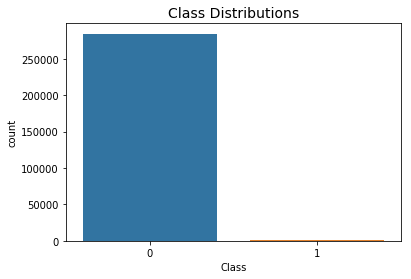

In [12]:
sns.countplot('Class', data=df)
plt.title('Class Distributions', fontsize=14)

- Transaction amount
- Transaction time

(0.0, 172792.0)

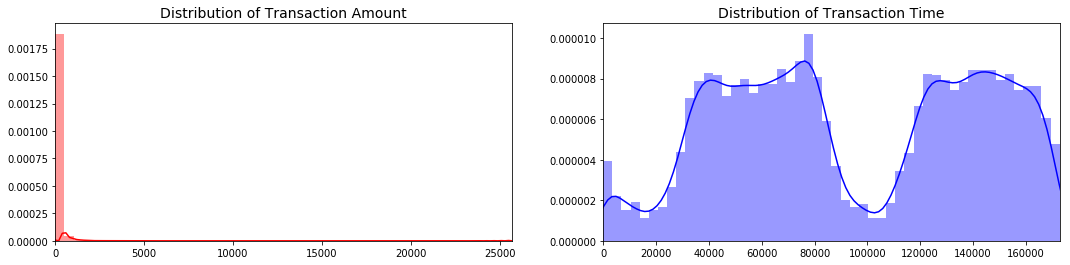

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# 2. 데이터 전처리

## 2.1 Scailing
- StandardScaler : 평균과 표준편차 사용
- MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링
- MaxAbsScaler : 최대절대값과 0이 각각 1, 0이 되도록 스케일링
- [**RobustScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) : 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [16]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

# Imbalanced data : train/test set을 구분하고 train에서 학습 후, test에 적용해야 하지만, imbalanced인 관계로 우선 전체 대상으로 학습
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [18]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## 2.2 Splitting the Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Normal', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


Normal 99.83 % of the dataset
Frauds 0.17 % of the dataset


Stratified를 위하여 아래와 같이 train/test set을 구분합니다.

In [121]:
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print('===========')
    print("Train:", train_index, "Test:", test_index)
    original_X_train, original_X_test = X.iloc[train_index], X.iloc[test_index]
    original_y_train, original_y_test = y.iloc[train_index], y.iloc[test_index]
    print('train', Counter(original_y_train))
    print('test', Counter(original_y_test))

# 마지막 fold에서, 원래 데이터의 class 비율이 fold에 잘 적용되었는지 비율을 확인
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values

# Unique label에 대한 count
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)

Train: [ 55362  55465  55519 ... 284804 284805 284806] Test: [    0     1     2 ... 56967 56968 56969]
train Counter({0: 227452, 1: 393})
test Counter({0: 56863, 1: 99})
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 55362  55465  55519 ... 113929 113930 113931]
train Counter({0: 227452, 1: 393})
test Counter({0: 56863, 1: 99})
Train: [     0      1      2 ... 284804 284805 284806] Test: [112368 112946 113169 ... 170890 170891 170892]
train Counter({0: 227452, 1: 394})
test Counter({0: 56863, 1: 98})
Train: [     0      1      2 ... 284804 284805 284806] Test: [167927 167989 168197 ... 227851 227852 227853]
train Counter({0: 227452, 1: 394})
test Counter({0: 56863, 1: 98})
Train: [     0      1      2 ... 227851 227852 227853] Test: [224770 225283 225367 ... 284804 284805 284806]
train Counter({0: 227452, 1: 394})
test Counter({0: 56863, 1: 98})


In [25]:
print(train_counts_label / len(original_y_train))
print(test_counts_label / len(original_y_test))

[0.99827076 0.00172924]
[0.99827952 0.00172048]


## 2.3 <font color='red'>Random Under-Sampling</font>
<img src="http://glemaitre.github.io/imbalanced-learn/_images/sphx_glr_plot_random_under_sampler_001.png">

**"Random Under Sampling"** : Imbalanced data에서 overfitting을 피하고, data의 균형을 맞추기 위하여, 데이터를 랜덤하게 제거하는 과정

- Imbalanced label의 비율 및 카운트를 구한다.
- 훨씬 적은 라벨의 수에 맞추어(Fraud), major label에서 label를 추출하여(Non fraud, normal) 1:1의 비율을 맞춘다.
- 데이터를 shuffle 한다.

이 과정에서 *당연히* 정보의 손실(information loss)가 발생한다. 우리의 문제에서는 492개의 non-fraud transaction을 284,315개의 non-fraud transaction에서 뽑는 것이기 때문에 많은 양의 정보 손실이 발생할 수 있다. 하지만, 데이터의 수에 의존하면 안된다.

In [27]:
# 데이터를 전체적으로 셔플한다.
df = df.sample(frac=1)

# 데이터 비율에 맞게 추출한다.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
140124,-0.284916,-0.013370,-0.234523,0.874976,1.200624,0.921851,0.587613,-0.306088,0.950280,-0.117533,-0.834149,0.266266,1.415595,-0.387658,-2.028682,0.946843,0.755939,-0.860824,0.161194,0.113884,0.742044,-0.034857,0.142285,0.548001,-0.231615,0.203159,-0.186905,-0.248120,-0.024564,-0.099179,0
152223,-0.186683,0.146019,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,-16.601197,5.569258,-13.932249,-0.204855,-7.581023,-1.013612,-9.014813,-16.092032,-6.050148,1.661029,2.419921,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,1
198639,-0.097813,0.562648,0.776585,0.210999,0.025874,-0.335264,0.192492,-0.404238,0.400709,-0.562409,-1.612433,1.198094,-0.381986,-0.576138,1.599150,-0.323556,1.363878,-0.335949,0.851174,-0.917499,3.103768,0.549871,0.561381,1.941749,-0.120072,0.861410,-1.023306,0.268626,0.134911,0.044031,0
263274,-0.296653,0.894959,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,-5.945634,4.475905,-7.607261,-0.160723,-13.010749,1.094382,-2.864039,-2.871342,-0.180614,0.647709,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,1
154668,-0.307413,0.208978,-1.929597,4.066413,-4.865184,5.898602,-0.552493,-1.555962,-3.833623,0.679512,-3.463765,-6.683689,7.021278,-11.102493,1.711755,-10.447633,-2.799076,-6.261741,-11.647158,-3.451436,-0.507537,0.942489,1.137212,0.674245,-0.531765,-0.433409,0.378659,0.198107,0.869694,0.228048,1


Subsample에서의 데이터 비율
1    0.5
0    0.5
Name: Class, dtype: float64


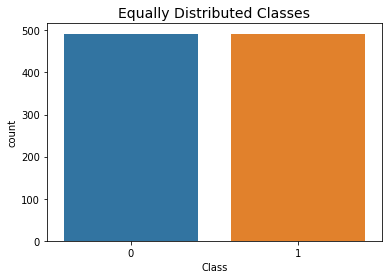

In [29]:
print('Subsample에서의 데이터 비율')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# 3. 데이터 분석

## 3.1 Correlation 분석

> Imbalanced data

Text(0.5,1,"Imbalanced Correlation Matrix \n (don't use for reference)")

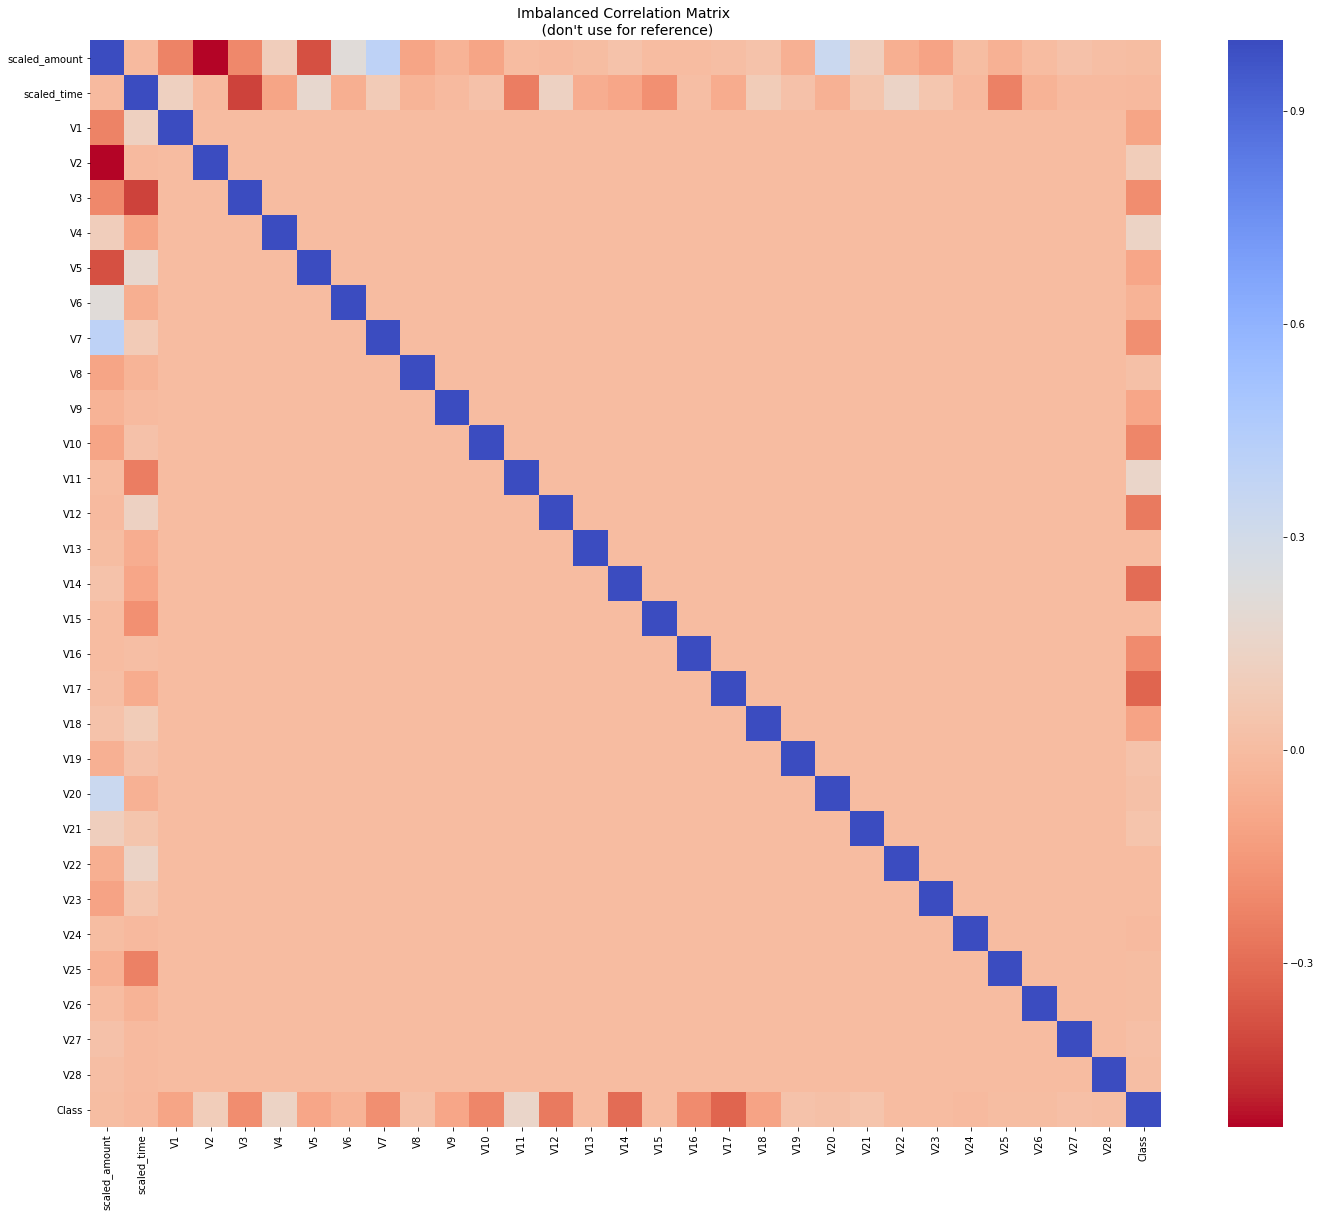

In [33]:
f, ax1 = plt.subplots(1, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

> Subsample data

Text(0.5,1,'SubSample Correlation Matrix \n (use for reference)')

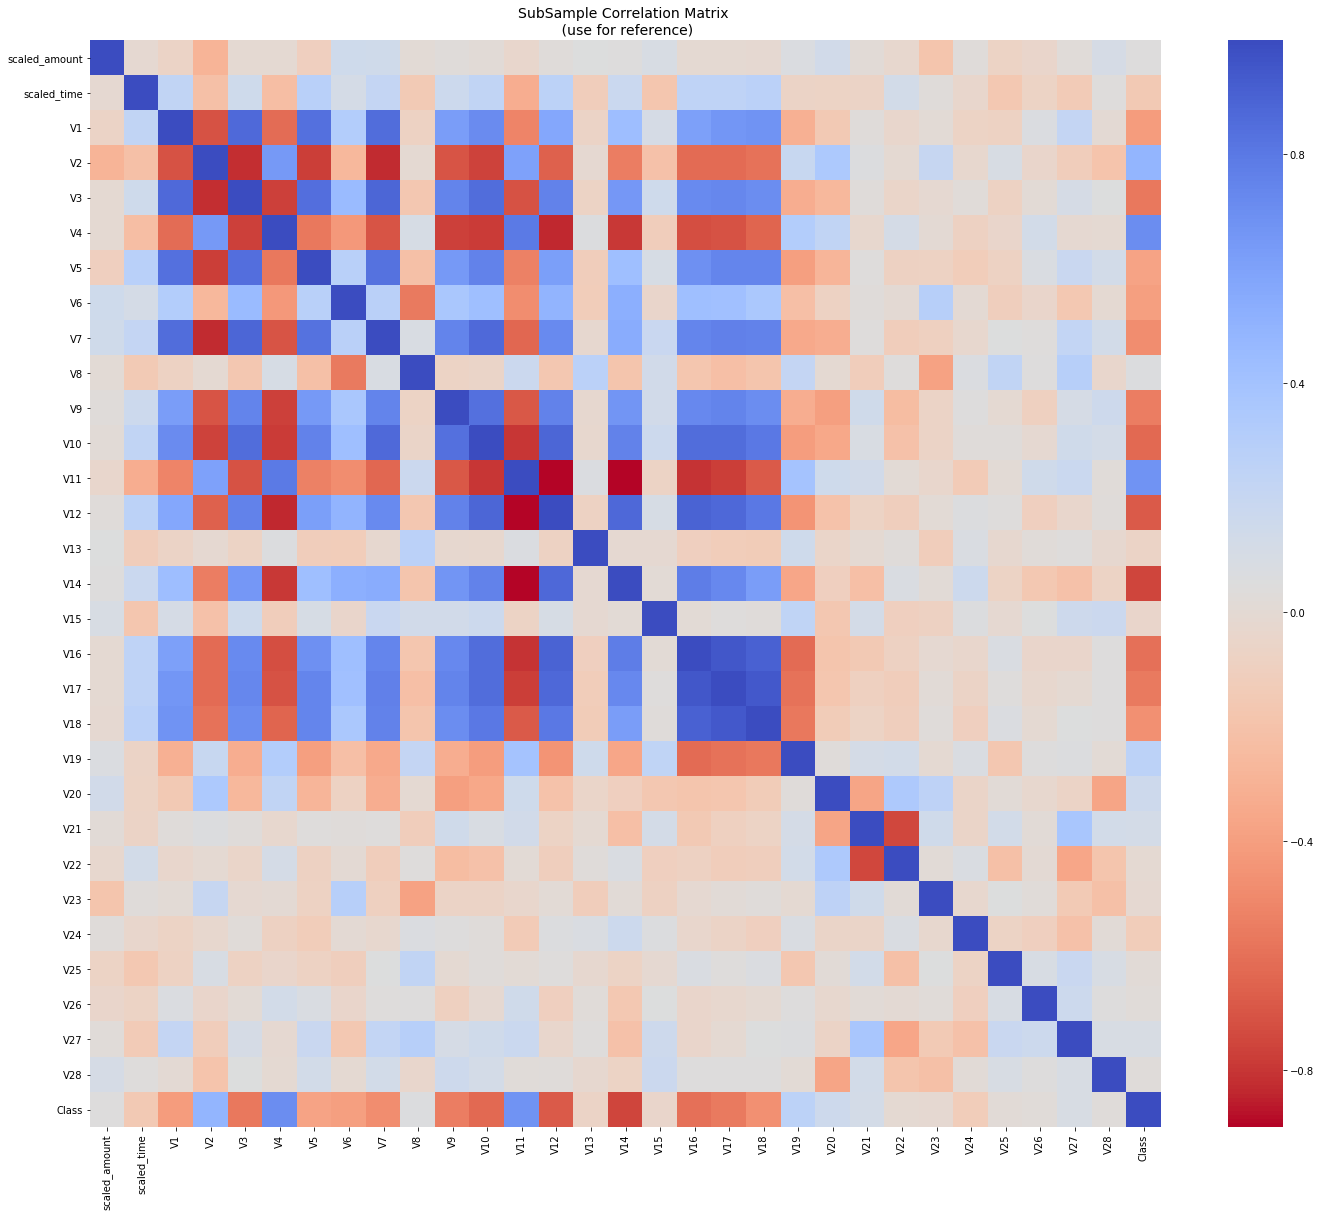

In [34]:
f, ax2 = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

> 음의 상관관계가 강한 특성들 : `V17`, `V14`, `V12`, `V10`

Feature의 값이 작을수록 더욱 fraud 같다.

Text(0.5,1,'V10 vs Class Negative Correlation')

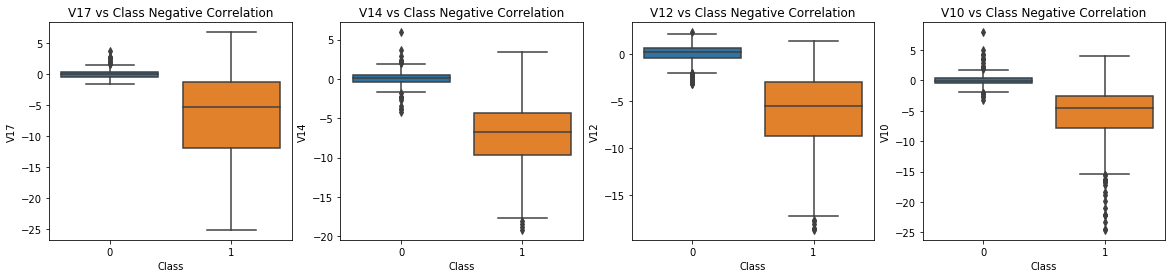

In [37]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

> 양의 상관관계가 강한 특성들 : `V11`, `V4`, `V2`, `V19`

Feature의 값이 클수록 더욱 fraud 같다.

Text(0.5,1,'V19 vs Class Positive Correlation')

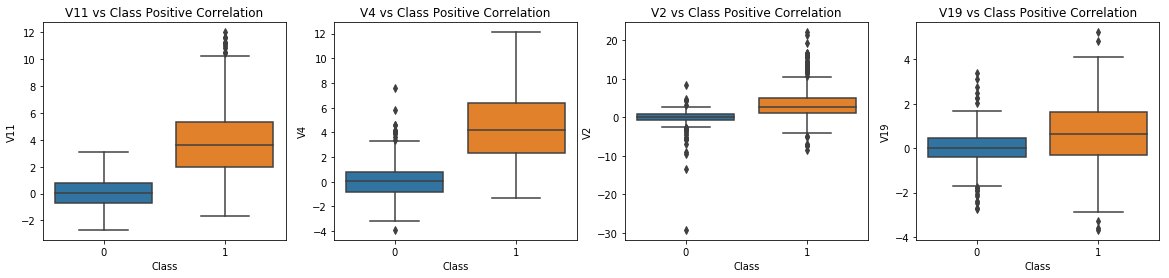

In [40]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=new_df,ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

## 3.2 Anomaly Detection:
<a id="anomaly"></a>
<img src="https://discourse-cdn-sjc1.com/business6/uploads/analyticsvidhya/original/2X/d/d11281b44c2e440b36aaf29156b5032105d2d06b.png">

각 feature 별로, target variable(calss)에 강한 상관관계를 가지는 extreme outliers를 제거 할 것입니다.

V17은 fraud class에 outlier가 없습니다. V17은 제외하고 음의 상관관계가 강했던 데이터를 살펴보겠습니다.

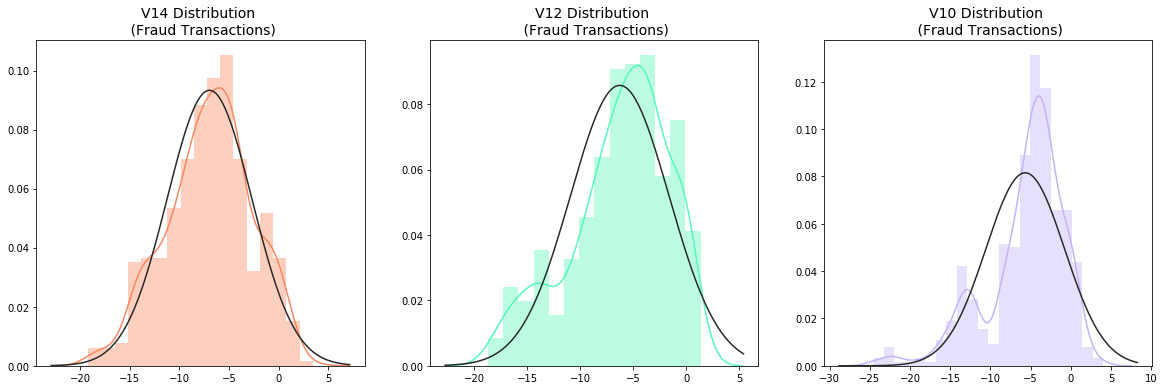

In [52]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [57]:
# V14는 음의 상관관계가 가장 높은 컬럼이다.
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('아웃라이어가 제거된 데이터의 크기: {}'.format(len(new_df)))

Quartile 25: -9.546412159574377 | Quartile 75: -4.256173215740009
iqr: 5.2902389438343675
Cut Off: 7.935358415751551
V14 Lower: -17.48177057532593
V14 Upper: 3.679185200011542
Feature V14 Outliers for Fraud Cases: 0
V10 outliers:[]
아웃라이어가 제거된 데이터의 크기: 977


In [59]:
# V12는 음의 상관관계가 가장 높은 컬럼이다.
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('아웃라이어가 제거된 데이터의 크기: {}'.format(len(new_df)))

Quartile 25: -8.595426555220822 | Quartile 75: -2.85880659793794
iqr: 5.7366199572828815
Cut Off: 8.604929935924321
V12 Lower: -17.200356491145143
V12 Upper: 5.746123337986381
V12 outliers: []
Feature V12 Outliers for Fraud Cases: 0
아웃라이어가 제거된 데이터의 크기: 973


In [60]:
# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('아웃라이어가 제거된 데이터의 크기: {}'.format(len(new_df)))

Quartile 25: -7.325233650284946 | Quartile 75: -2.502327410884358
iqr: 4.822906239400588
Cut Off: 7.234359359100882
V10 Lower: -14.559593009385829
V10 Upper: 4.732031948216524
V10 outliers: [-16.6011969664137, -24.403184969972802, -14.676470249746401, -20.949191554361104, -15.2399619587112, -18.2711681738888, -14.9246547735487, -15.1237521803455, -15.563791338730098, -23.2282548357516, -15.2318333653018, -18.9132433348732, -19.836148851696, -22.1870885620007, -22.1870885620007, -14.9246547735487, -15.2399619587112, -15.124162814494698, -15.346098846877501, -22.1870885620007, -22.1870885620007, -24.5882624372475, -16.2556117491401, -17.141513641289198, -16.6496281595399, -16.3035376590131, -15.563791338730098, -16.7460441053944]
Feature V10 Outliers for Fraud Cases: 28
아웃라이어가 제거된 데이터의 크기: 943


Extream outlier를 제거하고 난 후, 다시 box plot을 그려보면 아웃라이어가 물론 발생하긴 합니다. (수정된 데이터를 기반으로 IQR이 재계산 되므로)

Text(0.5,1,'V10 Feature \n Reduction of outliers')

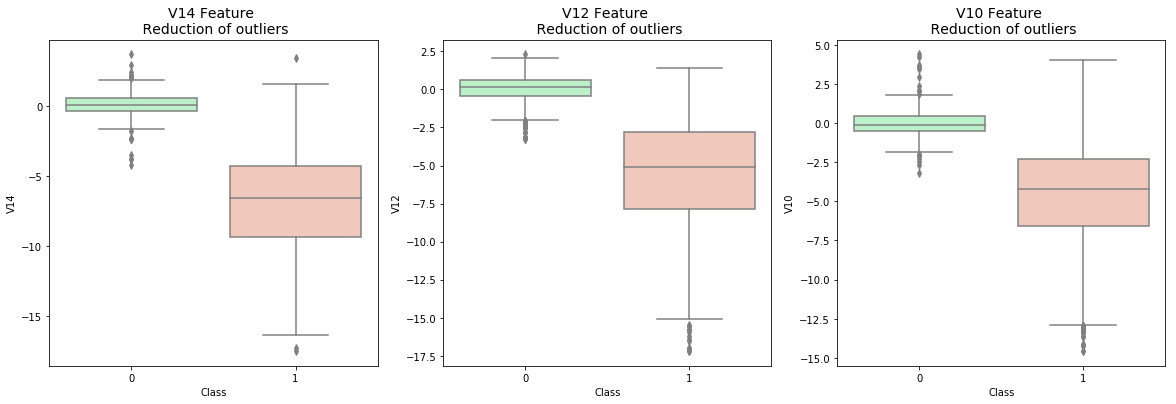

In [64]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

이런방법으로 양의 상관관계를 가지는 feature와 label이 0인 데이터에 대해서도 outlier 제거를 수행합니다.

# 4.  차원축소 및 클러스터링을 통한 Fraud detection

### [t-SNE ](https://www.youtube.com/watch?v=NEaUSP4YerM)
 - t-SNE는 꽤 정확하게 클러스터를 구분한다.
 - Subsample이 작은 데이터 셋이지만 (1000개 이하), cluster를 꽤 잘 구분해낸다.

In [65]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [66]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()

print("T-SNE 소요 시간 {:.2} s".format(t1 - t0))

T-SNE 소요 시간 1.9e+01 s


In [67]:
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()

print("PCA 소요 시간 {:.2} s".format(t1 - t0))

PCA 소요 시간 0.012 s


In [68]:
# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()

print("Truncated SVD 소요 시간 {:.2} s".format(t1 - t0))

Truncated SVD 소요 시간 0.005 s


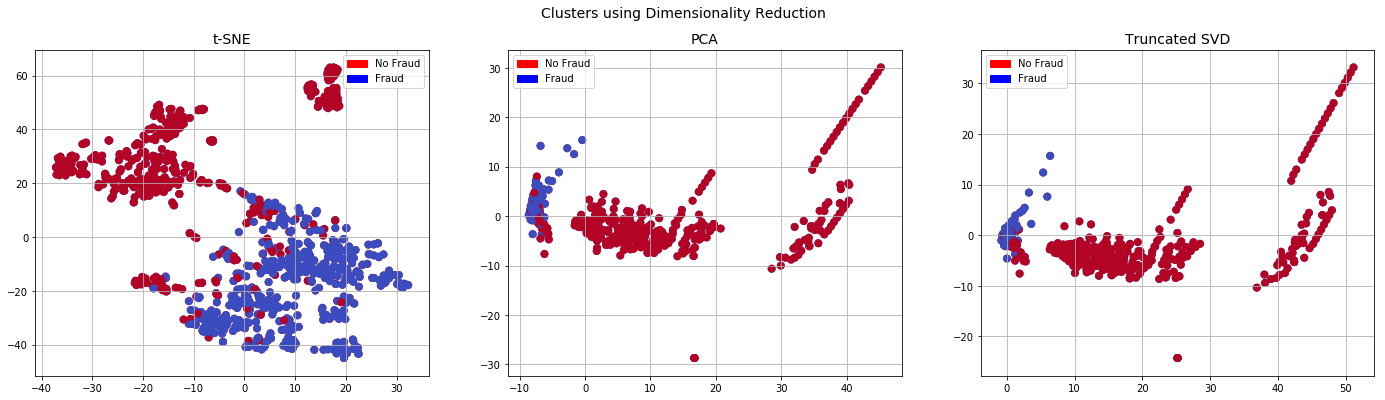

In [70]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='red', label='No Fraud')
red_patch = mpatches.Patch(color='blue', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

# 5. Classification을 이용한 Fraud detection

## 5.1 Random undersampling 데이터
### 5.1.1 학습하기

In [72]:
new_df.shape

(943, 31)

In [73]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [74]:
from sklearn.model_selection import train_test_split

# Undersampling이 1:1의 비율로 적용되었고, 이제 사용가능합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [76]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

> Cross validation

In [77]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, 
          "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 94.0 % accuracy score


> Search for hyperparameters

- Logistic regression

In [87]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameter
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

- K-Neighbors best estimator

In [88]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

- SVM

In [89]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

- Decisiontree classifier

In [90]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

- Randomforest classifier

In [91]:
# DecisionTree Classifier
rf_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)

# tree best estimator
rf_clf = grid_rf.best_estimator_

In [92]:
# 모델 비교
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('Randomforest Classifier Cross Validation Score', round(rf_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.7%
Knears Neighbors Cross Validation Score 93.78%
Support Vector Classifier Cross Validation Score 94.3%
DecisionTree Classifier Cross Validation Score 93.37%
Randomforest Classifier Cross Validation Score 93.24%


### 5.1.2 학습 도중 성능평가하기

> Learning curve

In [123]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/kakao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

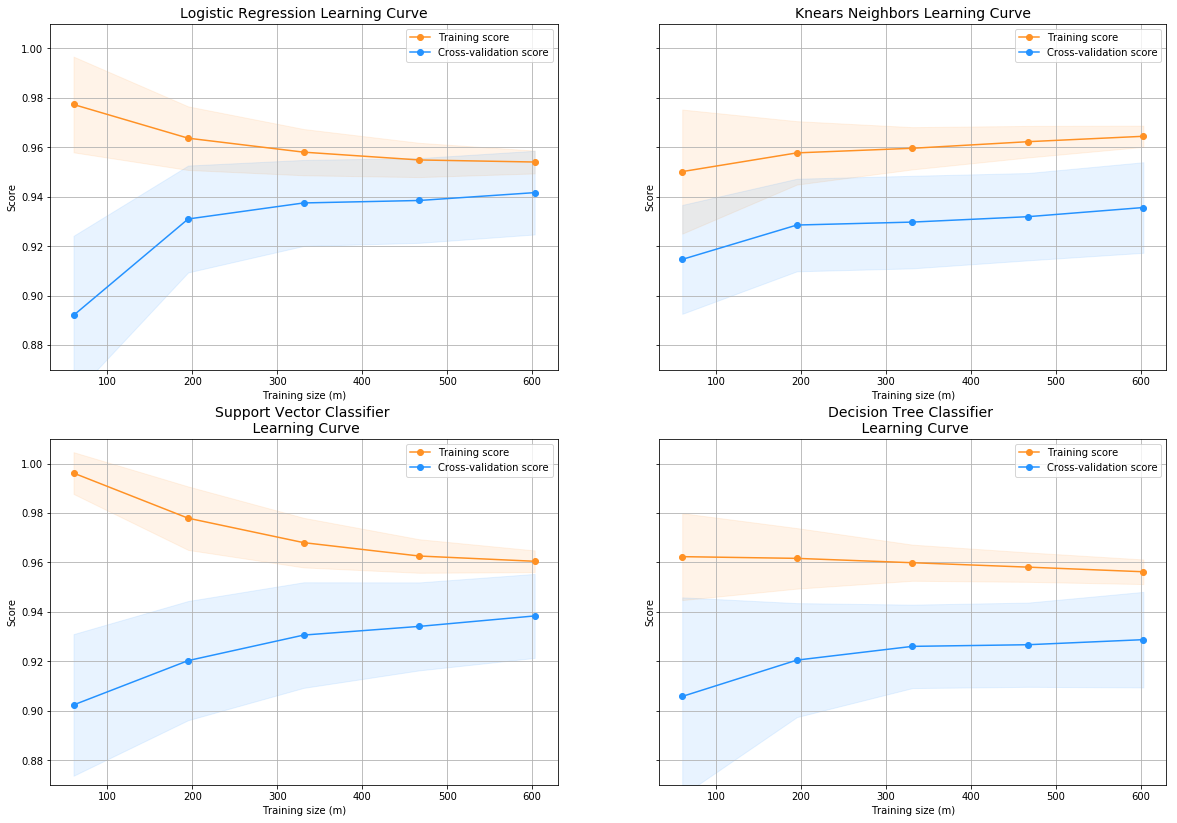

In [124]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

> Train set에 대한 AUC

In [125]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9815270239710538
KNears Neighbors:  0.934828697421981
Support Vector Classifier:  0.9780783582089553
Decision Tree Classifier:  0.9291398123021257


# 6. Undersample & Oversample

In [147]:
from sklearn.metrics import average_precision_score

## 6.1 Overfitting during Cross Validation

<font color=red>**It is simple, if you want to oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.**</font>

### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401">

Test data는 절대 손대면 안된다. 위의 경우는 test data가 이미 학습셋에 녹아들어가 있다.

### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372">

SMOTE는 cross validation이 수행되는 도중에 oversampling을 한다. Cross validation 전에 하지 않는다.

**References**: 
- https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation
- http://rikunert.com/SMOTE_explained
- https://www.youtube.com/watch?v=DQC_YE3I5ig&t=794s

## 6.2 SMOTE Technique (Over-Sampling):
<img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png", width=800>

Undersampling과 달리, majority class에 맞추어 oversampling을 한다. class imbalance problems을 해결하는 또 다른 방법이다.

Understanding SMOTE:

- **Solving the Class Imbalance**: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- **Location of the synthetic points**: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
- **Final Effect**: More information is retained since we didn't have to delete any rows unlike in random undersampling.
- **Accuracy || Time Tradeoff**: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [152]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [154]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_X_train), len(original_y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_X_test), len(original_y_test)))

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [155]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

In [158]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

> Cross validation

In [159]:
for train, test in sss.split(original_X_train, original_y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(), rand_log_reg)
    model = pipeline.fit(original_X_train[train], original_y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_X_train[test])
    
    accuracy_lst.append(pipeline.score(original_X_train[test], original_y_train[test]))
    precision_lst.append(precision_score(original_y_train[test], prediction))
    recall_lst.append(recall_score(original_y_train[test], prediction))
    f1_lst.append(f1_score(original_y_train[test], prediction))
    auc_lst.append(roc_auc_score(original_y_train[test], prediction))
    
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))

accuracy: 0.9736269499464015
precision: 0.056613931136324624
recall: 0.9035702693930542
f1: 0.10649949794276992


In [160]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_X_test)
print(classification_report(original_y_test, smote_prediction, target_names=labels))

             precision    recall  f1-score   support

   No Fraud       1.00      0.97      0.99     56863
      Fraud       0.06      0.94      0.11        98

avg / total       1.00      0.97      0.98     56961



In [161]:
y_score = best_est.decision_function(original_X_test)

In [162]:
average_precision = average_precision_score(original_y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.75


Text(0.5,1,'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

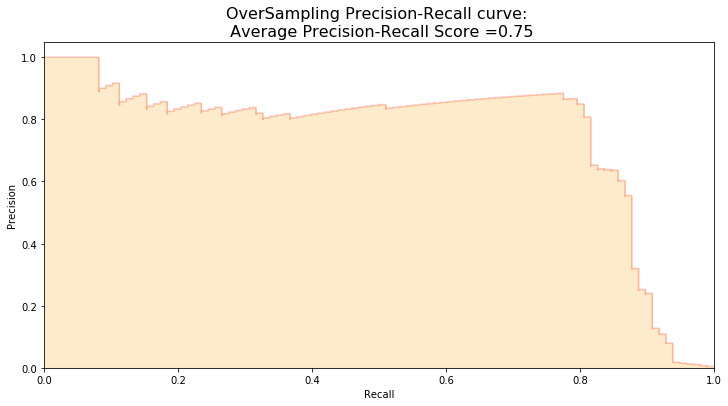

In [163]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_y_test, y_score)

plt.step(recall, precision, color='r', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

> 학습

In [171]:
sm = SMOTE(ratio='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_sample(original_X_train, original_y_train)

print(Xsm_train.shape)
print(ysm_train.shape)

(454904, 30)
(454904,)


In [172]:
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :4.857790231704712 sec


## 6.3 NearMiss Technique (Under-sampling)

`undersample_pipeline = imbalanced_make_pipeline(NearMiss(), rand_log_reg)`

# 7. Test

## 7.1 Confusion Matrix:

In [179]:
# Undersampling 되었던 데이터 중
print(X_test.shape)
print(y_test.shape)

(189, 30)
(189,)


[Text(0,0.5,''), Text(0,1.5,'')]

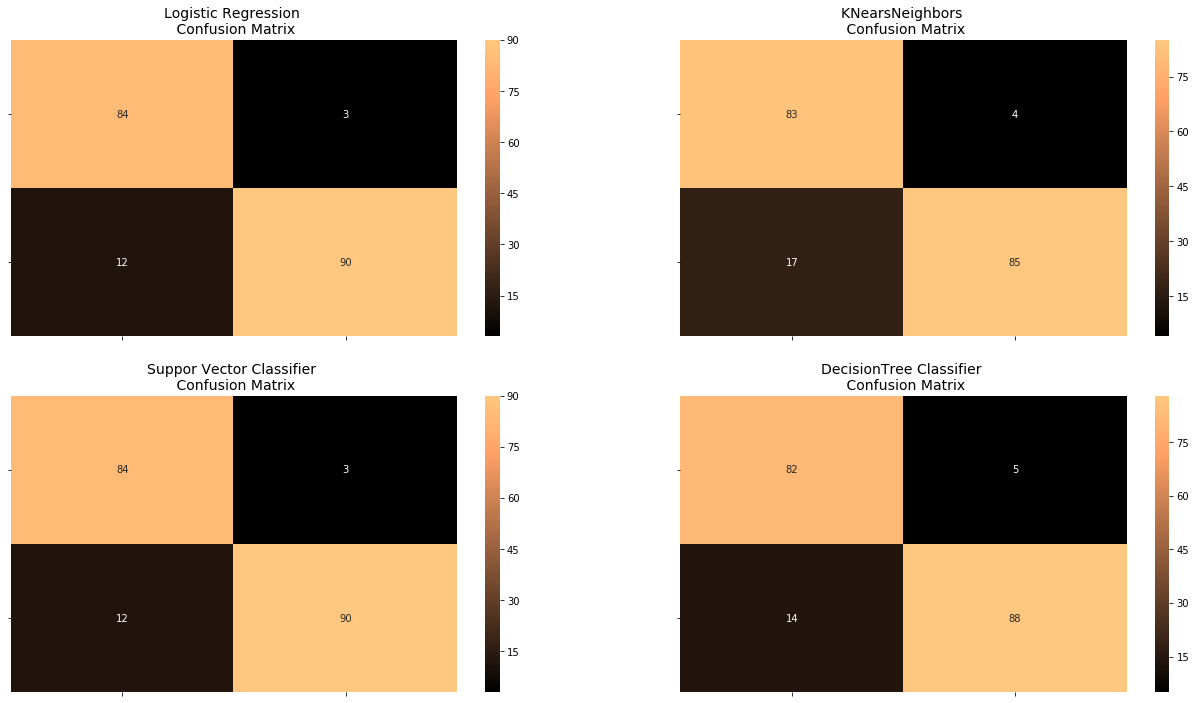

In [180]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=25, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=25, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=25, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=25, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=25, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=25, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=25, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=25, rotation=360)

In [182]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
             precision    recall  f1-score   support

          0       0.88      0.97      0.92        87
          1       0.97      0.88      0.92       102

avg / total       0.93      0.92      0.92       189

KNears Neighbors:
             precision    recall  f1-score   support

          0       0.83      0.95      0.89        87
          1       0.96      0.83      0.89       102

avg / total       0.90      0.89      0.89       189

Support Vector Classifier:
             precision    recall  f1-score   support

          0       0.88      0.97      0.92        87
          1       0.97      0.88      0.92       102

avg / total       0.93      0.92      0.92       189

Support Vector Classifier:
             precision    recall  f1-score   support

          0       0.85      0.94      0.90        87
          1       0.95      0.86      0.90       102

avg / total       0.90      0.90      0.90       189



In [183]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

In [184]:
# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

In [189]:
# Logistic Regression with SMOTE Technique (Cross validation 수행)
y_pred_sm = best_est.predict(original_X_test)
oversample_score = accuracy_score(original_y_test, y_pred_sm)

In [190]:
d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

In [191]:
# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.920635
1,Oversampling (SMOTE),0.973333


# 8. Neural Networks with Random UnderSampling Data vs OverSampling

In [192]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Using TensorFlow backend.


In [193]:
undersample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [194]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [195]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 603 samples, validate on 151 samples
Epoch 1/20
 - 0s - loss: 0.4674 - acc: 0.8375 - val_loss: 0.3125 - val_acc: 0.9139
Epoch 2/20
 - 0s - loss: 0.3193 - acc: 0.9071 - val_loss: 0.2639 - val_acc: 0.9073
Epoch 3/20
 - 0s - loss: 0.2579 - acc: 0.9237 - val_loss: 0.2216 - val_acc: 0.9205
Epoch 4/20
 - 0s - loss: 0.2162 - acc: 0.9320 - val_loss: 0.1975 - val_acc: 0.9139
Epoch 5/20
 - 0s - loss: 0.1879 - acc: 0.9370 - val_loss: 0.1795 - val_acc: 0.9205
Epoch 6/20
 - 0s - loss: 0.1664 - acc: 0.9386 - val_loss: 0.1719 - val_acc: 0.9205
Epoch 7/20
 - 0s - loss: 0.1508 - acc: 0.9386 - val_loss: 0.1602 - val_acc: 0.9338
Epoch 8/20
 - 0s - loss: 0.1389 - acc: 0.9403 - val_loss: 0.1539 - val_acc: 0.9338
Epoch 9/20
 - 0s - loss: 0.1279 - acc: 0.9486 - val_loss: 0.1421 - val_acc: 0.9404
Epoch 10/20
 - 0s - loss: 0.1181 - acc: 0.9519 - val_loss: 0.1468 - val_acc: 0.9470
Epoch 11/20
 - 0s - loss: 0.1126 - acc: 0.9552 - val_loss: 0.1431 - val_acc: 0.9404
Epoch 12/20
 - 0s - loss: 0.1055 - acc:

In [197]:
undersample_predictions = undersample_model.predict(original_X_test, batch_size=200, verbose=0)

In [198]:
undersample_fraud_predictions = undersample_model.predict_classes(original_X_test, batch_size=200, verbose=0)

In [203]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[55189  1674]
 [    5    93]]


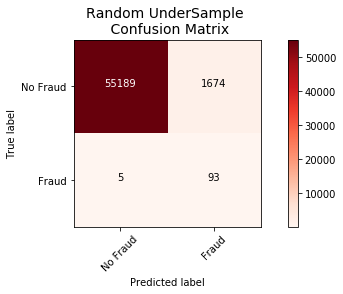

In [214]:
undersample_cm = confusion_matrix(original_y_test, undersample_fraud_predictions)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(8,4))

fig.add_subplot(111)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

### Keras with OverSampling (SMOTE):

In [205]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [206]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [207]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363923 samples, validate on 90981 samples
Epoch 1/20
 - 2s - loss: 0.0731 - acc: 0.9698 - val_loss: 0.0312 - val_acc: 0.9925
Epoch 2/20
 - 1s - loss: 0.0159 - acc: 0.9964 - val_loss: 0.0119 - val_acc: 0.9984
Epoch 3/20
 - 1s - loss: 0.0088 - acc: 0.9982 - val_loss: 0.0110 - val_acc: 0.9984
Epoch 4/20
 - 1s - loss: 0.0064 - acc: 0.9989 - val_loss: 0.0040 - val_acc: 0.9997
Epoch 5/20
 - 1s - loss: 0.0052 - acc: 0.9991 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 6/20
 - 1s - loss: 0.0046 - acc: 0.9992 - val_loss: 0.0031 - val_acc: 0.9996
Epoch 7/20
 - 1s - loss: 0.0037 - acc: 0.9994 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 8/20
 - 1s - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0023 - val_acc: 0.9997
Epoch 9/20
 - 1s - loss: 0.0023 - acc: 0.9996 - val_loss: 5.0680e-04 - val_acc: 1.0000
Epoch 10/20
 - 1s - loss: 0.0021 - acc: 0.9996 - val_loss: 0.0017 - val_acc: 0.9999
Epoch 11/20
 - 1s - loss: 0.0022 - acc: 0.9996 - val_loss: 9.0896e-04 - val_acc: 1.0000
Epoch 12/20
 - 1s - loss: 

In [208]:
oversample_predictions = oversample_model.predict(original_X_test, batch_size=200, verbose=0)

In [209]:
oversample_fraud_predictions = oversample_model.predict_classes(original_X_test, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[56826    37]
 [   18    80]]


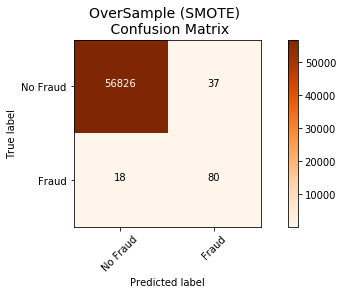

In [213]:
oversample_smote = confusion_matrix(original_y_test, oversample_fraud_predictions)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(8,4))

fig.add_subplot(111)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)